# Análisis de campañas de alivio financiero y propuesta para recuperación de cartera vencida en una entidad financiera

# *PROYECTO EN CONSTRUCCIÓN*

<img width="400" alt="image" src="https://github.com/user-attachments/assets/8a1e13c2-ff85-4c60-9ca3-51979bd4326a" />

## Breve descripción y alcance del proyecto

En el presente proyecto, se realiza el análisis de los datos correspondientes a una campaña que realiza la entidad financiera, a la cual se la referirá mediante el nombre ficticio ***Banco XYZ***, con el fin de recuperar al menos un 60% de su cartera vencida.

Este inconveniente le afecta al Banco dado que en el último semestre ha existido una baja de más del 15% en utilidades en comparación con el período anterior y se ha determinado mediante los reportes de auditoría interna que el **Departamento de Cobranzas** es uno de los que más fuertemente han contibuído a este déficit en las utilidades.

Una de las principales razones que generan las pérdidas en este departamento es la **Gestión de cartera vencida*, razón por la cual se realiza este análisis sobre las campañas de alivio financiero ofertadas previamente por el banco, llamadas *diferimiento* y *normalización*, mismas que han tenido baja efectividad en cuanto a recuperación monetaria frente a las metas previamente establecida.

Se van a responder a las siguientes preguntas para poder entender de mejor manera cuál es el problema actual, sus causas y de que manera se podría brindar una solución que satizfaga las necesidades del **Departamento de Cobranzas del Banco XYZ** sin descuidar el bienestar del cliente:

1. ¿Qué perfiles de clientes están siendo atendidos por cada campaña y canal?
2. ¿Cómo se distribuye la deuda según diferentes variables de análisis?
2. ¿Cómo podría optimizarse el enfoque actual para mejorar la efectividad de las campañas?

Para ofrecer una posible solución al **Departamento de Cobranzas** se va a centrar el enfoque en base a que tipos de perfiles tienen mayor deuda, por más tiempo, dónde se concentran más deudores demográficamente, si es que es necesario modificar las campañas actualmente ofrecidas por el Banco, ofrecer incentivos a los clientes para que se pongan al días con sus deudas de igual manera en base a determinados parámetros o variables, etc.

**Nota:** *A lo largo del presente reporte se analizan datos reales, mismos que han sido debidamente ofuscados y/u omitidos intencionalmente con el fin de proteger posible información sensible, así como por mantener respeto y apego hacia las leyes de protección de datos tanto locales como internacionales.*

## Carga del conjunto de datos en Pandas

Se importa la librería *pandas*, se carga el dataset y se muestran sus parámetros descriptivos incluyendo sus primeras filas, información general de tipos de datos, evaluación inicial de valores nulos, así como estadísticas descriptivas preliminares que otorga esta librería.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_morosidad = pd.read_csv("df_morosidad.csv")

## Limpieza y preprocesamiento de la información

En este análisis se va a revisar la calidad y consistencia de la información de entrada, incluyendo la posible existencia de valores nulos o en blanco, datos atípicos, entre otros.

In [3]:
df_morosidad.head()

,codigo_cliente,rango_morosidad,monto_credito,monto_por_vencer,monto_vencido,intereses,producto_host,dias_mora,gestor,recibe_sueldo_fijo,provincia_cliente,region,sector_general
0,DNI-9502992,31 - 60 DIAS,8045.23,5686.38,0.00,143.94,PRECISO,36,RED COMERCIAL,SÍ,PICHINCHA,SIERRA,SECTOR PÚBLICO
1,DNI-5110681,16 - 30 DIAS,5924.60,0.00,92.60,98.97,PRECISO,22,DIGITAL,NO,PICHINCHA,SIERRA,TRANSPORTE Y LOGÍSTICA
2,DNI-6527606,6 - 15 DIAS,5125.55,0.00,74.08,148.94,PRECISO,10,DIGITAL,NO,GUAYAS,COSTA,COMERCIO
3,DNI-5095519,16 - 30 DIAS,4848.91,0.00,142.72,65.76,PRECISO,23,DIGITAL,NO,PICHINCHA,SIERRA,COMERCIO
4,DNI-9856629,16 - 30 DIAS,6621.77,5462.92,0.00,127.39,PRECISO,28,RED COMERCIAL,NO,PICHINCHA,SIERRA,SERVICIOS


In [4]:
df_morosidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4115 entries, 0 to 4114
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   codigo_cliente      4115 non-null   object 
 1   rango_morosidad     4115 non-null   object 
 2   monto_credito       4115 non-null   float64
 3   monto_por_vencer    4115 non-null   float64
 4   monto_vencido       4115 non-null   float64
 5   intereses           4115 non-null   float64
 6   producto_host       4115 non-null   object 
 7   dias_mora           4115 non-null   int64  
 8   gestor              4115 non-null   object 
 9   recibe_sueldo_fijo  4115 non-null   object 
 10  provincia_cliente   4090 non-null   object 
 11  region              4115 non-null   object 
 12  sector_general      4115 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 418.1+ KB


In [5]:
df_morosidad.describe()

,monto_credito,monto_por_vencer,monto_vencido,intereses,dias_mora
count,4115.000000,4115.000000,4115.000000,4115.000000,4115.000000
mean,9889.804168,3742.993896,62.615878,165.204522,26.249332
std,11221.651826,7083.584846,135.121374,181.270760,13.370148
min,1124.280000,0.000000,0.000000,9.210000,10.000000
25%,4401.505000,0.000000,0.000000,60.200000,15.000000
50%,7072.150000,1493.760000,0.000000,113.110000,23.000000
75%,11161.935000,5186.860000,90.080000,204.440000,35.000000
max,209131.960000,138940.420000,3322.440000,2439.470000,60.000000


### Verificación de posibles valores blancos o nulos

In [6]:
df_morosidad.isna().sum()

codigo_cliente         0
rango_morosidad        0
monto_credito          0
monto_por_vencer       0
monto_vencido          0
intereses              0
producto_host          0
dias_mora              0
gestor                 0
recibe_sueldo_fijo     0
provincia_cliente     25
region                 0
sector_general         0
dtype: int64

Se puede ver en la celda anterior que de manera preliminar únicamente existen valores nulos en la variable *provincia_cliente* dentro del presente conjunto de datos, sin embargo si estos registros se eliminan se estaría subestimando la deuda que el Banco debe recuperar.

### Verificación de posibles valores inconsistentes

Se realiza un análisis de los valores únicos por cada columna para determinar si podría resultar conveniente convertirlos al tipo categórico de pandas.

In [7]:
df_morosidad.dtypes

codigo_cliente         object
rango_morosidad        object
monto_credito         float64
monto_por_vencer      float64
monto_vencido         float64
intereses             float64
producto_host          object
dias_mora               int64
gestor                 object
recibe_sueldo_fijo     object
provincia_cliente      object
region                 object
sector_general         object
dtype: object

In [8]:
posibles_columnas_categoricas = [
    "rango_morosidad",
    "producto_host",
    "gestor",
    "recibe_sueldo_fijo",
    "region",
    "sector_general"
]

for col in posibles_columnas_categoricas:
    print(f'Valores únicos en "{col}":')
    print(df_morosidad[col].unique())
    print("-" * 50)

Valores únicos en "rango_morosidad":
['31 - 60 DIAS' '16 - 30 DIAS' '6 - 15 DIAS']
--------------------------------------------------
Valores únicos en "producto_host":
['PRECISO' 'AUTOS' 'PRODUCTO MUJER' 'PRODUCTIVO' 'MICROFINANZAS' 'HABITAR']
--------------------------------------------------
Valores únicos en "gestor":
['RED COMERCIAL' 'DIGITAL']
--------------------------------------------------
Valores únicos en "recibe_sueldo_fijo":
['SÍ' 'NO']
--------------------------------------------------
Valores únicos en "region":
['SIERRA' 'COSTA' 'AMAZONIA' 'NO_ESPECIFICADO' 'GALAPAGOS']
--------------------------------------------------
Valores únicos en "sector_general":
['SECTOR PÚBLICO' 'TRANSPORTE Y LOGÍSTICA' 'COMERCIO' 'SERVICIOS'
 'INDUSTRIA / MANUFACTURA' 'MINERÍA Y EXTRACCIÓN'
 'SIN ACTIVIDAD ECONÓMICA' 'EDUCACIÓN Y SALUD' 'INDUSTRIA'
 'SECTOR FINANCIERO' 'AGROPECUARIO' 'CONSTRUCCIÓN'
 'TECNOLOGÍA Y TELECOMUNICACIONES']
--------------------------------------------------


Se puede observar que no existen valores inconsistentes al haber analizado los valores únicos en cada columna las columnas o variables ***rango_morosidad***, ***producto_host***, ***gestor***, ***recibe_sueldo_fijo***, ***region*** y ***sector_general*** pueden convertirse a un tipo de variable categórico. Además la variable ***recibe_sueldo_fijo*** puede convertirse a binaria para un procesamiento más eficiente.

In [9]:
df_morosidad[posibles_columnas_categoricas] = df_morosidad[posibles_columnas_categoricas].astype("category")
df_morosidad["recibe_sueldo_fijo"] = df_morosidad["recibe_sueldo_fijo"]\
    .map({"SI": True, "NO": False}).astype("bool")

In [10]:
df_morosidad.dtypes

codigo_cliente          object
rango_morosidad       category
monto_credito          float64
monto_por_vencer       float64
monto_vencido          float64
intereses              float64
producto_host         category
dias_mora                int64
gestor                category
recibe_sueldo_fijo        bool
provincia_cliente       object
region                category
sector_general        category
dtype: object

## Exploración de datos

Con el fin de ayudar a recuperar la cartera vencida, el **Banco XYZ** propuso originalmente realizar 2 tipos de campañas para ayudar a los deudores en estado de mora a aliviar ya sea los intereses o el plazo de pago de las cuotas restantes de sus deudas. Estas campañas son:

1. **Diferimiento**: Es una medida mediante la cual una entidad financiera pospone temporalmente el pago de una o más cuotas de un crédito, sin que eso implique que el cliente ha incumplido. Esta campaña se aplicará en clientes que tengan entre 21 y 60 días en mora.
2. **Normalización**: Es un proceso mediante el cual una entidad financiera busca reconducir un crédito moroso a un estado "al día", generalmente a través de reestructuración, refinanciamiento o acuerdos de pago según la capacidad real del cliente. Esta campaña se aplicará en clientes que tengan entre 10 y 20 días en mora.

*Más adelante en este documento se evaluará si es necesario realizar ajustes en los rangos de **días en mora** requeridos para calificar a cualquiera de estas campañas.*

El siguiente paso consiste en crear una columna condicional que refleje el tipo de campaña que se va a ofertar a cada cliente según la cantidad de días que el mismo se mantenga en mora.

In [11]:
condiciones = [
    (df_morosidad["dias_mora"] >= 10) & (df_morosidad["dias_mora"] <= 20),
    (df_morosidad["dias_mora"] >= 21) & (df_morosidad["dias_mora"] <= 60)
]

resultados = ["DIFERIMIENTO", "NORMALIZACIÓN"]
df_morosidad["tipo_campania"] = np.select(condiciones, resultados, default="NO_APLICA")

In [12]:
df_morosidad["tipo_campania"] = df_morosidad["tipo_campania"].astype("category")

In [13]:
df_morosidad.sample(5)

,codigo_cliente,rango_morosidad,monto_credito,monto_por_vencer,monto_vencido,intereses,producto_host,dias_mora,gestor,recibe_sueldo_fijo,provincia_cliente,region,sector_general,tipo_campania
2894,DNI-931257,31 - 60 DIAS,7086.75,4253.60,0.00,42.59,PRECISO,48,DIGITAL,True,SUCUMBIOS,AMAZONIA,TRANSPORTE Y LOGÍSTICA,NORMALIZACIÓN
2902,DNI-479529,6 - 15 DIAS,3649.50,2955.52,0.00,97.00,MICROFINANZAS,12,DIGITAL,True,TUNGURAHUA,SIERRA,INDUSTRIA / MANUFACTURA,DIFERIMIENTO
1298,DNI-4088528,16 - 30 DIAS,7671.48,0.00,89.18,217.67,PRECISO,25,RED COMERCIAL,True,GUAYAS,COSTA,EDUCACIÓN Y SALUD,NORMALIZACIÓN
1114,DNI-6848137,31 - 60 DIAS,5630.20,0.00,90.11,121.19,PRECISO,35,RED COMERCIAL,False,PICHINCHA,SIERRA,EDUCACIÓN Y SALUD,NORMALIZACIÓN
994,DNI-2103950,31 - 60 DIAS,5992.03,5080.11,0.00,158.83,MICROFINANZAS,40,DIGITAL,True,EL ORO,COSTA,COMERCIO,NORMALIZACIÓN


In [14]:
df_morosidad["tipo_campania"].value_counts()

tipo_campania
NORMALIZACIÓN    2340
DIFERIMIENTO     1775
Name: count, dtype: int64

### Clientes por tipo de campaña

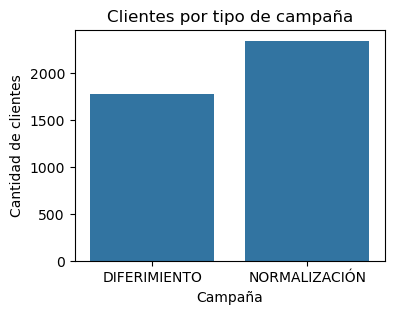

In [15]:
plt.figure(figsize=(4, 3))
sns.countplot(
    data=df_morosidad,
    x="tipo_campania"
)

plt.title("Clientes por tipo de campaña")
plt.ylabel("Cantidad de clientes")
plt.xlabel("Campaña")
plt.show()

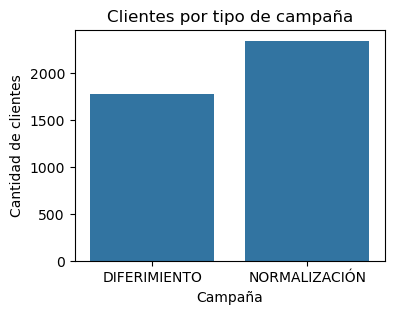

In [16]:
plt.figure(figsize=(4, 3))
sns.countplot(
    data=df_morosidad,
    x="tipo_campania"
)

plt.title("Clientes por tipo de campaña")
plt.ylabel("Cantidad de clientes")
plt.xlabel("Campaña")
plt.show()

### Análisis por Canal de Gestión

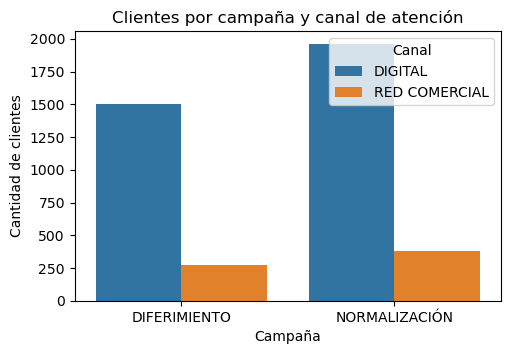

In [17]:
plt.figure(figsize=(5.5, 3.5))

sns.countplot(
    data=df_morosidad,
    x="tipo_campania",
    hue="gestor"
)

plt.title("Clientes por campaña y canal de atención")
plt.ylabel("Cantidad de clientes")
plt.xlabel("Campaña")
plt.legend(title="Canal")
plt.show()

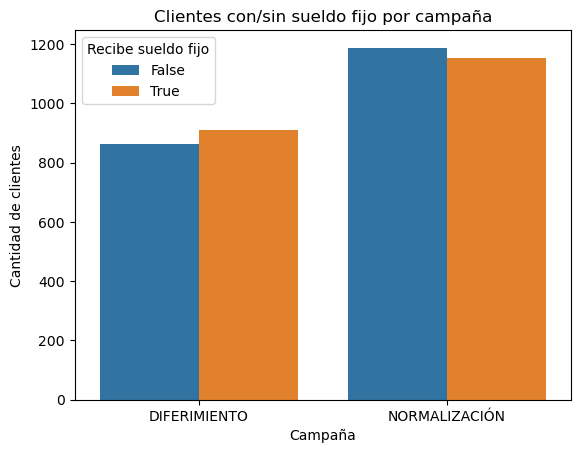

In [18]:
sns.countplot(
    data=df_morosidad,
    x="tipo_campania",
    hue="recibe_sueldo_fijo"
)
plt.title("Clientes con/sin sueldo fijo por campaña")
plt.ylabel("Cantidad de clientes")
plt.xlabel("Campaña")
plt.legend(title="Recibe sueldo fijo")
plt.show()

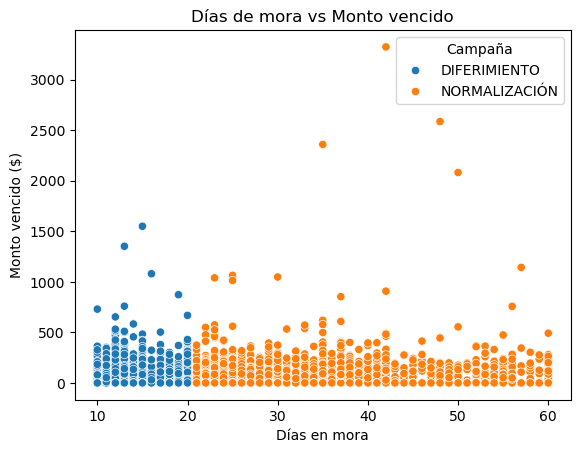

In [19]:
sns.scatterplot(data=df_morosidad, x="dias_mora", y="monto_vencido", hue="tipo_campania")
plt.title("Días de mora vs Monto vencido")
plt.xlabel("Días en mora")
plt.ylabel("Monto vencido ($)")
plt.legend(title="Campaña")
plt.show()

Se puede observar que en la campaña de **DIFERIMIENTO** predominan deudas bajas entre USD 100 y USD 500 aproximadamente, con variabilidad relativamente baja al existir pocos valores extremos.

Por otro lado, en el caso de la campaña de **NORMALIZACIÓN** el monto vencido promedio se muestra ligeramente más alto, con una mayor presencia de valores atípicos, rondando en algunos casos valores por encima de USD 1000 y en ocasiones incluso USD 3000.

Se puede ver entonces de manera preliminar que estos clientes representan un riesgo de impago más alto para el banco, por lo cual se podría considerar para la campaña de **NORMALIZACIÓN** plantear una estrategia correctiva mientras que en **DIFERIMIENTO** podría ser todavía una estrategia preventiva.

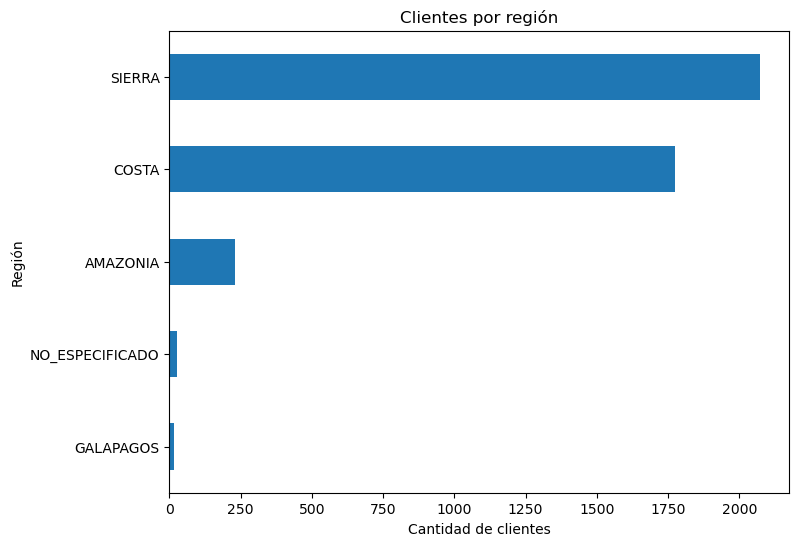

In [20]:
provincia_counts = df_morosidad["region"].value_counts().sort_values()
provincia_counts.plot(kind="barh", figsize=(8,6))
plt.title("Clientes por región")
plt.xlabel("Cantidad de clientes")
plt.ylabel("Región")
plt.show()

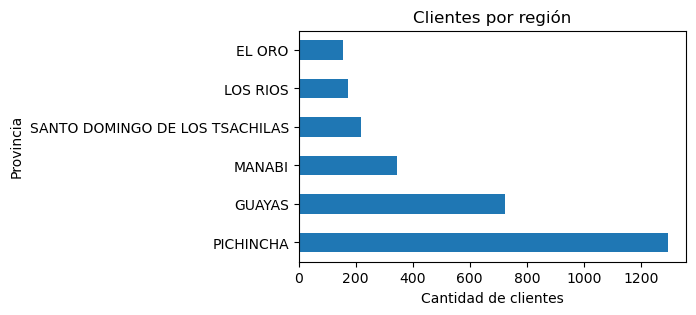

In [21]:
provincia_counts = df_morosidad["provincia_cliente"].value_counts().sort_values()\
.nlargest(6)
provincia_counts.plot(kind="barh", figsize=(5,3))
plt.title("Clientes por región")
plt.xlabel("Cantidad de clientes")
plt.ylabel("Provincia")
plt.show()

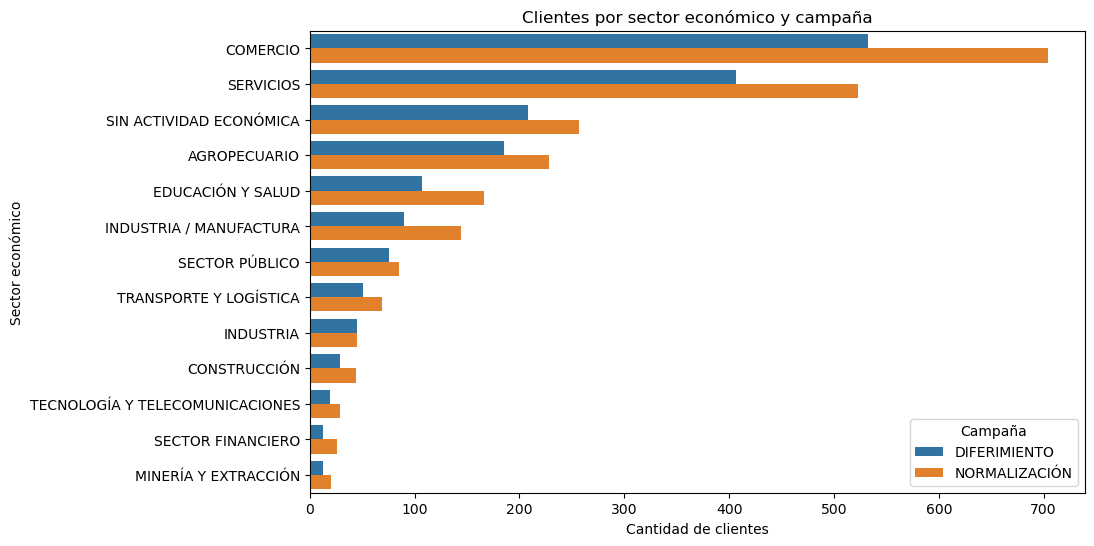

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(
    data=df_morosidad,
    y="sector_general",
    hue="tipo_campania",
    order=df_morosidad["sector_general"].value_counts().index
)
plt.title("Clientes por sector económico y campaña")
plt.xlabel("Cantidad de clientes")
plt.ylabel("Sector económico")
plt.legend(title="Campaña")
plt.show()

In [23]:
print("Total de clientes:\t\t", len(df_morosidad))
print(f"Total monto vencido: \t\t${df_morosidad['monto_vencido'].sum():,.2f}")
print(f"Total intereses acumulados: \t${df_morosidad['intereses'].sum():,.2f}")
print("Clientes con sueldo fijo:\t", df_morosidad[df_morosidad["recibe_sueldo_fijo"] == True].shape[0])

Total de clientes:		 4115
Total monto vencido: 		$257,664.34
Total intereses acumulados: 	$679,816.61
Clientes con sueldo fijo:	 2063


In [24]:
df_morosidad.sample(3)

,codigo_cliente,rango_morosidad,monto_credito,monto_por_vencer,monto_vencido,intereses,producto_host,dias_mora,gestor,recibe_sueldo_fijo,provincia_cliente,region,sector_general,tipo_campania
3189,DNI-3178618,16 - 30 DIAS,7454.79,0.00,85.24,202.76,PRECISO,16,DIGITAL,True,GUAYAS,COSTA,SIN ACTIVIDAD ECONÓMICA,DIFERIMIENTO
2734,DNI-3194295,16 - 30 DIAS,9191.75,0.00,227.39,103.68,PRECISO,20,DIGITAL,True,PICHINCHA,SIERRA,SERVICIOS,DIFERIMIENTO
535,DNI-8336516,31 - 60 DIAS,8637.29,8278.67,0.00,156.00,MICROFINANZAS,31,DIGITAL,False,EL ORO,COSTA,COMERCIO,NORMALIZACIÓN


In [25]:
df_morosidad.columns

Index(['codigo_cliente', 'rango_morosidad', 'monto_credito',
       'monto_por_vencer', 'monto_vencido', 'intereses', 'producto_host',
       'dias_mora', 'gestor', 'recibe_sueldo_fijo', 'provincia_cliente',
       'region', 'sector_general', 'tipo_campania'],
      dtype='object')

In [26]:
df_morosidad[['monto_credito', 'monto_por_vencer', 'monto_vencido']]

,monto_credito,monto_por_vencer,monto_vencido
0,8045.23,5686.38,0.00
1,5924.60,0.00,92.60
2,5125.55,0.00,74.08
3,4848.91,0.00,142.72
4,6621.77,5462.92,0.00
...,...,...,...
4110,5067.91,0.00,52.13
4111,5852.66,0.00,57.61
4112,60579.68,10582.67,0.00
4113,11528.22,10616.58,0.00


In [32]:
df_morosidad[['monto_credito', 'monto_por_vencer', 'monto_vencido']].sum() \
.apply(lambda x: f"$ {x:,.2f}")

monto_credito       $ 40,696,544.15
monto_por_vencer    $ 15,402,419.88
monto_vencido          $ 257,664.34
dtype: object

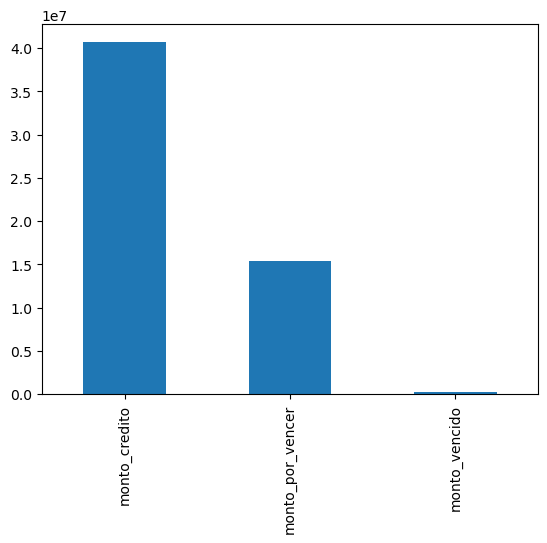

In [35]:
df_morosidad[['monto_credito', 'monto_por_vencer', 'monto_vencido']].sum() \
.plot(kind= "bar")

plt.show()